In [ ]:
import torch
from dataset import OxfordPetsDataset
from transforms import train_transform, val_transform
from unet_segmentation import AttentionUNet
from losses import CombinedLoss


In [18]:
from dataset import OxfordPetsDataset


In [12]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())


2.8.0+cu128
CUDA available: True


In [19]:
train_dataset = OxfordPetsDataset(
    images_dir="data/images",
    masks_dir="data/annotations/trimaps"
)

print("Dataset size:", len(train_dataset))


Dataset size: 7390


In [21]:
import importlib, dataset
importlib.reload(dataset)   # forces reloading latest version of dataset.py
from dataset import OxfordPetsDataset


In [22]:
train_dataset = OxfordPetsDataset(
    images_dir="data/images",
    masks_dir="data/annotations/trimaps"
)

img, mask = train_dataset[0]
print("Mask dtype:", mask.dtype)


Mask dtype: torch.int64


In [23]:
from dataset import OxfordPetsDataset
from transforms import train_transform, val_transform

train_dataset = OxfordPetsDataset(
    images_dir="data/images",
    masks_dir="data/annotations/trimaps",
    transform=train_transform
)

val_dataset = OxfordPetsDataset(
    images_dir="data/images",
    masks_dir="data/annotations/trimaps",
    transform=val_transform
)

img, mask = train_dataset[0]
print("Image shape:", img.shape, "dtype:", img.dtype)   # expect [3, 512, 512], float32
print("Mask shape:", mask.shape, "dtype:", mask.dtype) # expect [512, 512], int64


Image shape: torch.Size([3, 512, 512]) dtype: torch.float32
Mask shape: torch.Size([512, 512]) dtype: torch.int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.378562].


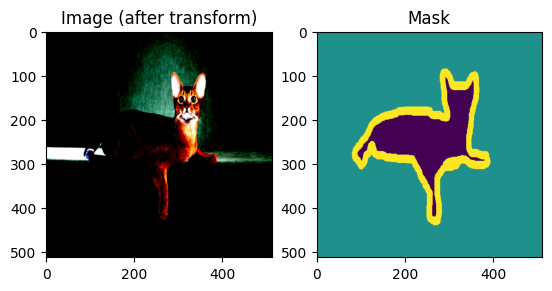

In [24]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(img.permute(1,2,0).cpu().numpy())
plt.title("Image (after transform)")

plt.subplot(1,2,2)
plt.imshow(mask.cpu().numpy())
plt.title("Mask")
plt.show()
